In [384]:
from face_recognition import face_locations
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

import pandas as pd

## 1. Trying out face_recognition package

In [385]:
run_test = False

if run_test == True:
    # Download the image from the web
    urls = [
        'https://static.posters.cz/image/750/plakater/spring-forrest-i101995.jpg',
        'https://images.pexels.com/photos/1035671/pexels-photo-1035671.jpeg?cs=srgb&dl=pexels-anastasiya-lobanovskaya-1035671.jpg&fm=jpg'
        ]

    for i, url in enumerate(urls):
        print(f"Prediction {i}")
        response = requests.get(url)

        # Open the image using Pillow
        img = Image.open(BytesIO(response.content))

        # Convert the image to a numpy array
        img_array = np.asarray(img)

        # Find all the faces in the image
        print("prediction:", face_locations(img_array))

        # Show the image
        plt.imshow(img_array)
        plt.show()

        print()



## 2. Data exploring

In [386]:
# Read in all files from the dataset as dataframes.
list_eval_partition = pd.read_csv('../data/celeb_dataset/list_eval_partition.csv')
list_bbox_celeba = pd.read_csv('../data/celeb_dataset/list_bbox_celeba.csv')
list_landmarks_celeba = pd.read_csv('../data/celeb_dataset/list_landmarks_align_celeba.csv')
list_attr_celeba = pd.read_csv('../data/celeb_dataset/list_attr_celeba.csv')


display(list_eval_partition.head())
print("list_eval_partition.csv: \nRecommended partitioning of images into training, validation, testing sets. \
      \nImages 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing.\n\n")

display(list_bbox_celeba.head())
print('list_bbox_celeba.csv: \
      \nBounding box information for each image. "x_1" and "y_1" represent the upper left \
      \npoint coordinate of bounding box. "width" and "height" represent the width and height of bounding box\n\n')

display(list_landmarks_celeba.head())
print("list_landmarks_align_celeba.csv: \
      \nImage landmarks and their respective coordinates. There are 5 landmarks: \
      \nleft eye, right eye, nose, left mouth, right mouth\n\n")

display(list_attr_celeba.head())
print('list_attr_celeba.csv: \
      \nAttribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative\n\n')


,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


list_eval_partition.csv: 
Recommended partitioning of images into training, validation, testing sets.       
Images 1-162770 are training, 162771-182637 are validation, 182638-202599 are testing.




,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


list_bbox_celeba.csv:       
Bounding box information for each image. "x_1" and "y_1" represent the upper left       
point coordinate of bounding box. "width" and "height" represent the width and height of bounding box




,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


list_landmarks_align_celeba.csv:       
Image landmarks and their respective coordinates. There are 5 landmarks:       
left eye, right eye, nose, left mouth, right mouth




,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


list_attr_celeba.csv:       
Attribute labels for each image. There are 40 attributes. "1" represents positive while "-1" represents negative




In [387]:
# We are gonna focus on the attributes for now.

display(list_attr_celeba.head().T)

,0,1,2,3,4
image_id,000001.jpg,000002.jpg,000003.jpg,000004.jpg,000005.jpg
5_o_Clock_Shadow,-1,-1,-1,-1,-1
Arched_Eyebrows,1,-1,-1,-1,1
Attractive,1,-1,-1,1,1
Bags_Under_Eyes,-1,1,-1,-1,-1
Bald,-1,-1,-1,-1,-1
Bangs,-1,-1,-1,-1,-1
Big_Lips,-1,-1,1,-1,1
Big_Nose,-1,1,-1,-1,-1
Black_Hair,-1,-1,-1,-1,-1


In [388]:
# !pip install sweetviz
import sweetviz as sv

skip_eda = True # if you dont want to use the eda.
in_notebook = False # whether you want to print in notebook or export as html.

if skip_eda == False:
    analysis = sv.analyze(list_attr_celeba)

    if in_notebook == False:
        analysis.show_html(filepath='SWEETVIZ_REPORT.html', open_browser=True, layout='vertical', scale=None)
    elif in_notebook == True:
        analysis.show_notebook(w=None, h=None, scale=None, layout='widescreen', filepath=None)

## 3. AFTER AUGMENTATION - Lets read in the data

In [389]:
data = pd.read_csv('../data/preds_on_all_augmentations.csv')

data.head(3).T

,0,1,2
image_id,066574.jpg,194491.jpg,151301.jpg
5_o_Clock_Shadow,1,-1,-1
Arched_Eyebrows,-1,1,-1
Attractive,-1,1,-1
Bags_Under_Eyes,1,-1,1
Bald,-1,-1,-1
Bangs,-1,-1,-1
Big_Lips,-1,-1,1
Big_Nose,-1,-1,1
Black_Hair,-1,-1,1


## 4. SHAP

**SHAP values**

We tried with SHAP values to see if it could be used for calculating the influence of the latent features. 

Since SHAP works by masking features and in that way calculate their influence, this didnt work. 

In [390]:
from pathlib import Path
import face_recognition

class FaceRecognitionModel:
    def predict(self, X):

        y_pred = []

        for i in X:

            # Image name from features
            image_name = i[0]

            # Load the image file
            path = Path('../data/celeb_dataset/img_align_celeba/img_align_celeba')
            image_path = path / image_name
            image = face_recognition.load_image_file(image_path)

            # Try to recognize the face
            face_loc = face_recognition.face_locations(image)
            
            if len(face_loc) == 0:
                y_pred.append(0)
            else:
                y_pred.append(1)
        
        return np.array(y_pred)

model = FaceRecognitionModel()
print("Test that it can predict:", model.predict(attr.iloc[:3,:].values))

# Trying out SHAP - doesnt work.
import shap

# X is all the attributes except the last column (Recognized)
X = attr.iloc[:, 1:-1].values
y = attr.iloc[:, -1].values
y_true = [1]*len(X)

# Initialize the SHAP explainer with the face recognition model
# explainer = shap.KernelExplainer(model.predict, X)

# Calculate the SHAP values for the physical attributes
# shap_v = explainer.shap_values(X)

Test that it can predict: [1 1 0]


## 5. LIME (Local Interpretable Model-Agnostic Explanations)

Or something like it. 

We want to try to create a DT classifier to find latent variables to the predicted output. In that way to check if there are any latent variables that might contribute to recognizing a face or not.

1. Without balancing data

In [391]:
# The different targets from the augmentaitons
data.columns.to_list()[-5:]

['Recognized',
 'Recognized_lighter_skin',
 'Recognized_darker_skin',
 'Recognized_brighter',
 'Recognized_contrast']

We are only looking on the output of the original model here.

In [392]:
# Se we are removing the last 4 columns, which are the augmentations.
data_normal = data.iloc[:, :-4]
data_normal.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'Recognized'],
      dtype='object')

In [393]:
# In order to investigate the influnce of different latent features on the face recognition model,
# we will try to train a decision tree classifier on the latent features and the output of the face recognition model.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

random_state = 42

X = data_normal.iloc[:, 1:-1].values
y = data_normal.iloc[:, -1].values

# replace all -1 with 0
y = np.where(y == -1, 0, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)

clf = DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, y_dt_pred))
print("F1 score:       ", f1_score(y_test, y_pred))

Accuracy score:  0.8450997588248191
F1 score:        0.9104732940505607


In [394]:
y_train.shape

(36487,)

Balancing data, so there are an equal amount of recognized / not recognized faces in the training data

Splitting the data into test and train, while also balancing it.

In [395]:
from sklearn.utils import resample

def balance_data(X_train, y_train):
    # Find the minimum count among the labels
    min_count = min(np.bincount(y_train))

    # Resample instances for each unique label
    balanced_X = np.concatenate([resample(X_train[y_train == label], n_samples=min_count, replace=False)
                                 for label in np.unique(y_train)])
    balanced_y = np.concatenate([np.full(min_count, label) for label in np.unique(y_train)])

    return balanced_X, balanced_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_train, y_train = balance_data(X_train, y_train)

Trying to use gridsearch to find better params for the DT classifier.

In [396]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 12, 15, 20, 25],
    'min_samples_split': [1, 2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': [None, 'sqrt', 5, 10]  # [None, 'sqrt', 5, 10]
}

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=random_state)

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Obtain the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
clf = grid_search.best_estimator_

# Fit the best estimator to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data using the best estimator
y_pred = clf.predict(X_test)

# Get the best score (accuracy) from the grid search
best_accuracy = grid_search.best_score_
print("Best Accuracy:", best_accuracy)

# Calculate the accuracy score
print("Best Parameters:", best_params)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("F1 score:       ", f1_score(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([3216, 5906]))

In [ ]:
# Name features from clf.feature_importances_ with the names from data_normal.columns
feature_importances = pd.DataFrame(
    clf.feature_importances_,
    index = data_normal.columns[1:-1],
    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
High_Cheekbones,0.357269
Attractive,0.160338
Wearing_Hat,0.092011
Arched_Eyebrows,0.068343
Bags_Under_Eyes,0.042228
Bushy_Eyebrows,0.032207
Wearing_Lipstick,0.030771
Bangs,0.029397
Oval_Face,0.022720
Male,0.022240


**Visualize the decision tree**

In [ ]:
# visualize the decision tree with dtreeviz.trees
# from dtreeviz.trees import dtreeviz

# before, on mac:
# brew install graphviz
# test in cmd: dot -V

create_dtree = False

if create_dtree:
    import dtreeviz
    import graphviz.backend as be

    viz = dtreeviz.model(clf,
                    X_train,
                    y_train,
                    # target_name='Recognized',
                    # feature_names=feat_name,
                    # class_names=['Not recognized', 'Recognized'],
                    # orientation='TD',
                    # fancy=True,
                    # X=None,
                    # label_fontsize=12,
                    # ticks_fontsize=8,
                    )

    viz.view()

## 6. Fairness metrics

**Equalized odds**

True positive / False positive

So in this case, how many many cases did it predict a face of how many faces there actually were?

For each protected group.

In [ ]:
attr.head(2).T

,0,1
image_id,000001.jpg,000002.jpg
5_o_Clock_Shadow,-1,-1
Arched_Eyebrows,1,-1
Attractive,1,-1
Bags_Under_Eyes,-1,1
Bald,-1,-1
Bangs,-1,-1
Big_Lips,-1,-1
Big_Nose,-1,1
Black_Hair,-1,-1


## Readin downsized dataset and darker/lighter skin color filters

attr has all images. We want to downsize. 

In [ ]:
# We downsized the images. We are loading the downsized images here.

try:
    # data = pd.read_csv('../data/downsized_attributes_incl_darker_lighter.csv').rename(columns={'found': 'Recognized'})
    # Bence added all predictions.
    data = pd.read_csv('../data/preds_on_all_augmentations.csv').rename(columns={'found': 'Recognized'})
    print("Read in preds_on_all_augmentations.csv")

except:
    print("Could not find downsized_attributes_incl_darker_lighter.csv. \nTrying downsized_attributes.csv.")
    data = pd.read_csv('../data/downsized_attributes.csv').rename(columns={'found': 'Recognized'})

    print("Starting to recognize the images in the darker and lighter filtered images. This will take a while.")
    
    data['Recognized_lighter_skin'] = 1
    data['Recognized_darker_skin'] = 1

    data.shape, data.columns


    from pathlib import Path
    from tqdm import tqdm 
    import sys

    run_cell == False

    if run_cell == False:
        sys.exit()

    not_found_dict = {}

    # for folder in ['img_align_celeba', 'darker_skin', 'lighter_skin']:
    for folder in ['darker_skin', 'lighter_skin']:

        path = Path(f'../data/celeb_dataset/img_align_celeba/{folder}')
        image_paths = [path / img_id for img_id in data.image_id]

        not_found = []
        not_found_ids = []

        with tqdm(total=len(image_paths), desc='Processing Images') as pbar:
            for img_path in image_paths:
                image = face_recognition.load_image_file(img_path)
                face_locations = face_recognition.face_locations(image)
                if len(face_locations) == 0:
                    not_found.append(img_path)
                    not_found_ids.append(img_path.name)
                
                # Update the progress bar
                pbar.update(1)

        not_found_dict[folder] = not_found

        for image_id in not_found_dict[folder]:
            data.loc[data['image_id'] == image_id.name, 'Recognized_' + folder] = -1

        data.to_csv('../data/downsized_attributes_incl_darker_lighter.csv', index=False)
        print("Saved downsized_attributes_incl_darker_lighter.csv")

Read in preds_on_all_augmentations.csv


In [ ]:
data.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'Recognized', 'Recognized_lighter_skin',
       'Recognized_darker_skin', 'Recognized_brighter', 'Recognized_contrast'],
      dtype='object')

In [ ]:
print(data.Recognized.value_counts())
print(data.Recognized_lighter_skin.value_counts())
print(data.Recognized_darker_skin.value_counts())
print(data.Recognized_brighter.value_counts())
print(data.Recognized_contrast.value_counts())



 1    40000
-1     5609
Name: Recognized, dtype: int64
 1    39806
-1     5803
Name: Recognized_lighter_skin, dtype: int64
 1    39579
-1     6030
Name: Recognized_darker_skin, dtype: int64
 1    40288
-1     5321
Name: Recognized_brighter, dtype: int64
 1    40218
-1     5391
Name: Recognized_contrast, dtype: int64


## Equilized odds

In [ ]:
def equalized_odds(protected_feature, data=data, target='Recognized'):
    """
    Calculate the equalized odds for a given protected feature.
    
    Input protected_features: The columns name protected feature to calculate the equalized odds for.
    Returns the equalized odds for the given protected feature.
    """

    tpr = data.loc[(data[target] == 1) & (data[protected_feature] == 1)].shape[0]
    fpr = data.loc[(data[target] == -1) & (data[protected_feature] == 1)].shape[0]

    feature_1 = tpr/(tpr + fpr)

    tpr = data.loc[(data[target] == 1) & (data[protected_feature] == -1)].shape[0]
    fpr = data.loc[(data[target] == -1) & (data[protected_feature] == -1)].shape[0]

    feature_0 = tpr/(tpr + fpr)

    return feature_1, feature_0

# print("Equalized odds for features:")
# for feature in ['Attractive', 'Chubby', 'Male', 'Pale_Skin']:
#     eq_odds = np.round(equalized_odds(feature), 3)
#     print(f"\n{feature} = True:  {eq_odds[0]}")
#     print(f"{feature} = False: {eq_odds[1]}")

# Now we are saving the equalized odds for each feature in a dataframe for later use
odds_df = pd.DataFrame(columns={'Feature': str, 'normal': float, 'darker_skin': float, 'lighter_skin': float, 'brighter': float, 'contrast': float})

features = ['Attractive', 'Chubby', 'Male', 'Pale_Skin']
features = list(data.columns)[1:-5]

for feature in features:

    eq_odds = np.round(equalized_odds(feature, data=data, target='Recognized'), 3)
    eq_odds_dark = np.round(equalized_odds(feature, data=data, target='Recognized_darker_skin'), 3)
    eq_odds_light = np.round(equalized_odds(feature, data=data, target='Recognized_lighter_skin'), 3)
    eq_odds_brighter = np.round(equalized_odds(feature, data=data, target='Recognized_brighter'), 3)
    eq_odds_contrast = np.round(equalized_odds(feature, data=data, target='Recognized_contrast'), 3)


    odds_df.loc[len(odds_df)] = [feature + ", True", eq_odds[0], eq_odds_dark[0], eq_odds_light[0], eq_odds_brighter[0], eq_odds_contrast[0]]
    odds_df.loc[len(odds_df)] = [feature + ", False", eq_odds[1], eq_odds_dark[1], eq_odds_light[1], eq_odds_brighter[1], eq_odds_contrast[1]]

# odds_df['diff. from org. dataset'] = odds_df['celeba-dataset'] - odds_df['celeba-color-filter']

odds_df.to_latex("../figures/odds_all_features.tex", index=False)

odds_df

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


,Feature,normal,darker_skin,lighter_skin,brighter,contrast
0,"5_o_Clock_Shadow, True",0.935,0.928,0.931,0.940,0.939
1,"5_o_Clock_Shadow, False",0.870,0.861,0.866,0.877,0.875
2,"Arched_Eyebrows, True",0.986,0.984,0.985,0.985,0.986
3,"Arched_Eyebrows, False",0.842,0.831,0.837,0.851,0.848
4,"Attractive, True",0.958,0.954,0.956,0.959,0.961
...,...,...,...,...,...,...
75,"Wearing_Necklace, False",0.869,0.859,0.865,0.876,0.874
76,"Wearing_Necktie, True",0.950,0.947,0.948,0.953,0.950
77,"Wearing_Necktie, False",0.872,0.862,0.867,0.878,0.877
78,"Young, True",0.888,0.879,0.884,0.894,0.893


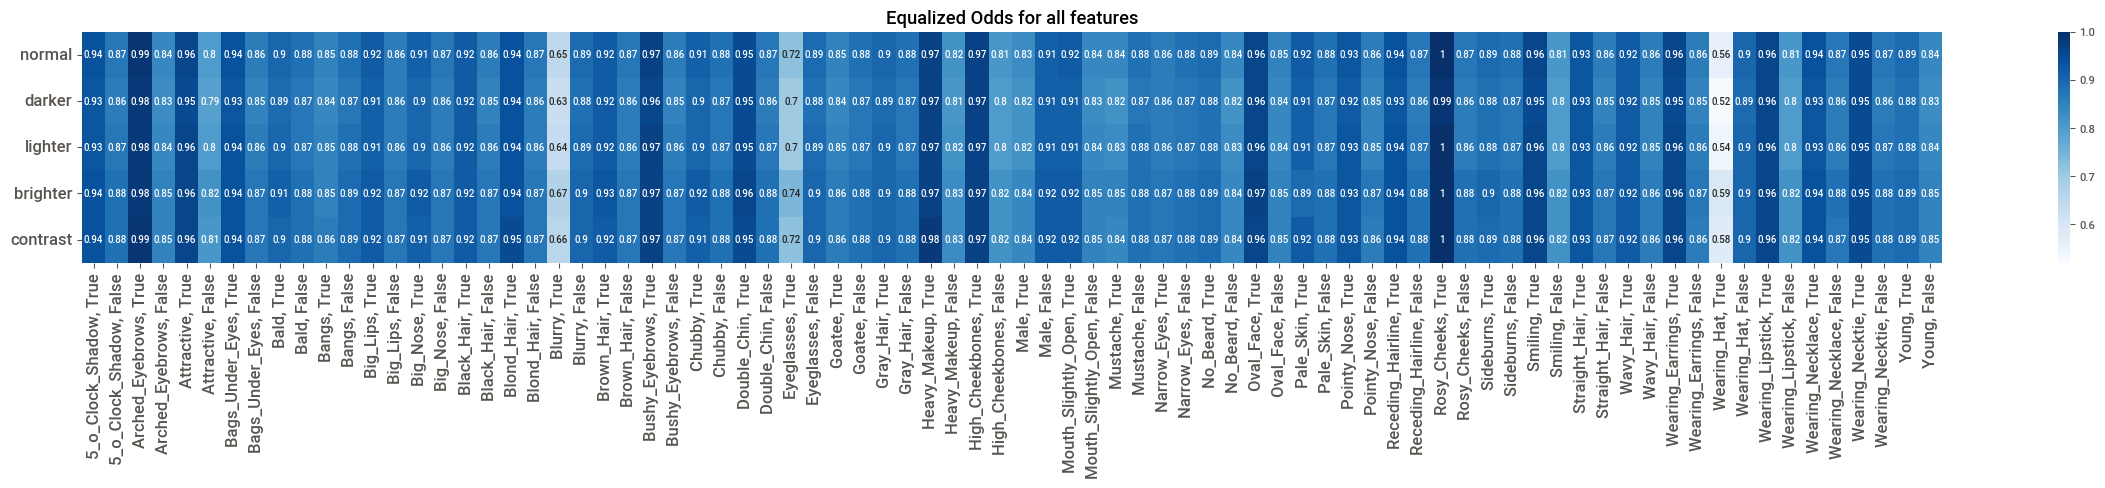

In [ ]:
#### prepare the dataframe
odds_plot = odds_df.set_index('Feature')
odds_plot = odds_plot.rename(columns={'normal': 'normal', 'darker_skin': 'darker', 'lighter_skin': 'lighter'})
odds_plot = odds_plot.round(2)

#### create the heatmap and set the settings
plt.figure(figsize=(30, 3))

# create the heatmap
sns.heatmap(odds_plot.T, annot=True, cmap='Blues', fmt='.3g', annot_kws={"fontsize": 7})

# set label size
plt.tick_params(labelsize=12)

# remove the x label
plt.xlabel('')

# rotate the y labels
plt.yticks(rotation=0)

# set the title 
plt.title('Equalized Odds for all features')

# save the figure and show it
plt.savefig('../figures/heatmap_odds.png', dpi=300, bbox_inches='tight')
plt.show()

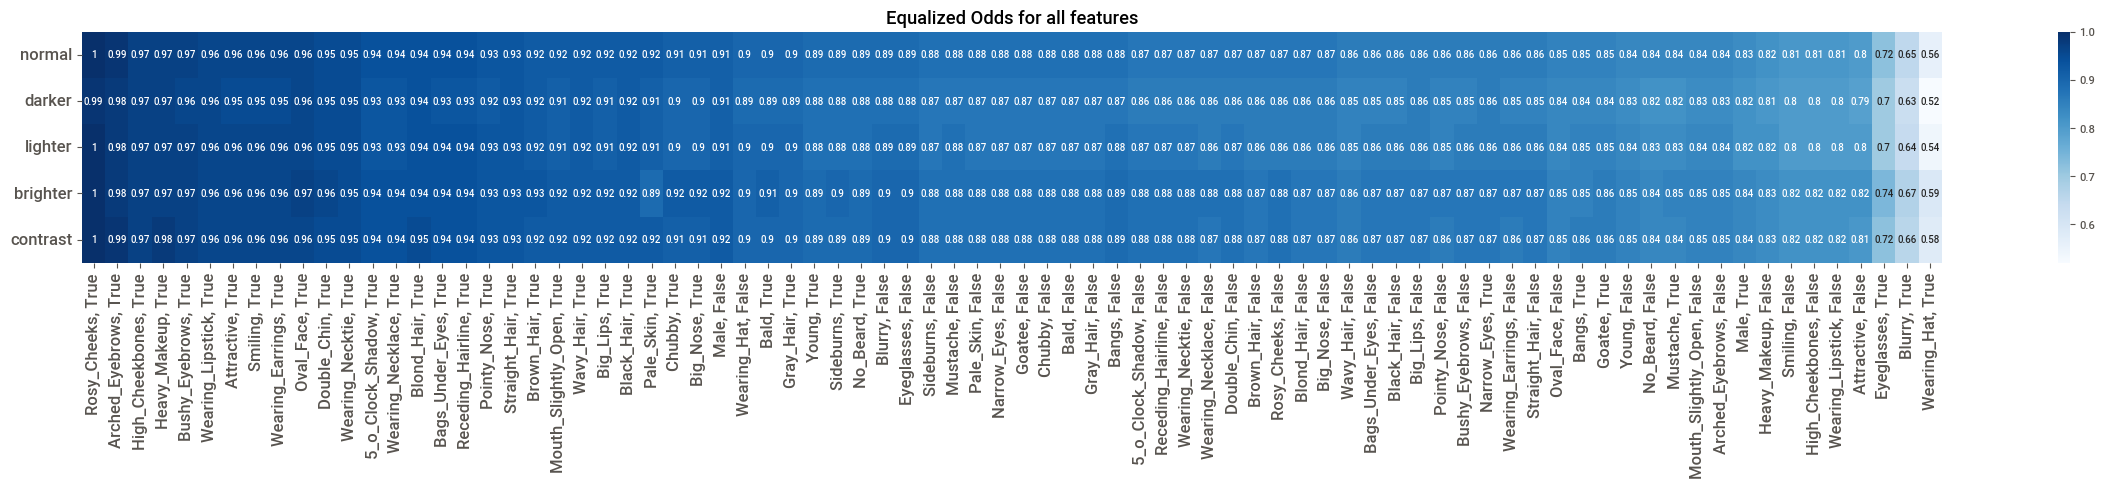

In [ ]:
#### prepare the dataframe - this time by sorting it
odds_plot_sorted = odds_plot.sort_values(by=['normal'], ascending=False).copy() # thise time we sort it

#### create the heatmap and set the settings
plt.figure(figsize=(30, 3))

# create the heatmap
sns.heatmap(odds_plot_sorted.T, annot=True, cmap='Blues', fmt='.3g', annot_kws={"fontsize": 7})

# set label size
plt.tick_params(labelsize=12)

# remove the x label
plt.xlabel('')

# rotate the y labels
plt.yticks(rotation=0)

# set the title 
plt.title('Equalized Odds for all features')

# save the figure and show it
plt.savefig('../figures/heatmap_odds_sorted.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
#### create the heatmap and set the settings
plt.figure(figsize=(3, 30))

# create the heatmap
sns.heatmap(odds_plot_sorted, annot=True, cmap='Blues', fmt='.3g', annot_kws={"fontsize": 7})

# set label size
plt.tick_params(labelsize=12)

# remove the x label
plt.xlabel('')

# rotate the y labels
plt.yticks(rotation=0)

# set the title 
plt.title('Equalized Odds for all features')

# save the figure and show it
plt.savefig('../figures/heatmap_odds_sorted_vertical.png', dpi=300, bbox_inches='tight')
# plt.show()
plt.close()

## Protected features and their combinations

In [ ]:
data.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young', 'Recognized', 'Recognized_lighter_skin',
       'Recognized_darker_skin', 'Recognized_brighter', 'Recognized_contrast'],
      dtype='object')

In [ ]:
def equalized_odds_multiple(protected_features: list, combinations: list = combinations, data: pd.DataFrame = data, target: list = 'Recognized', decimals: int = 3) -> int:
    """
    Calculate the equalized odds for a combination of values for some protected features.
    
    Input protected_features: The columns names protected feature to calculate the equalized odds for.
    Returns the equalized odds for the given protected feature.
    """
    eq_odds_all_combinations = []

    for feature_values in combinations:

        condition = True
        for feature, value in zip(protected_features, feature_values):
            condition &= (data[feature] == value)

        tpr = data.loc[(data[target] == 1) & condition].shape[0]
        fpr = data.loc[(data[target] == -1) & condition].shape[0]

        eq_odds = np.round(tpr/(tpr + fpr), decimals)

        eq_odds_all_combinations.append(eq_odds)

    return eq_odds_all_combinations


def label_combinations(protected_features: dict = protected_features) -> list:
    """
    Function returns all combinations of the protected features and labels them.

    Input should be a dict, where columns names are stored in keys and values are
    the labels for the binary values are stored in a list. E.g.:
    
    protected_features = {'Attractive': ['Attractive', 'Unattractive']}
    """    

    import itertools

    # get all possible combinations of the protected features
    combinations = list(itertools.product([1, -1], repeat=len(protected_features)))

    prot_list = list(protected_features.values())
    comb_list = []

    # label the combinations
    for combination in combinations:
        c_str = ""

        for idx, value in enumerate(combination):
            # get correct index in dict
            if value == -1:
                value = 2
            
            c_str += prot_list[idx][value - 1]

            # add , between the features
            if idx != len(combination)-1:
                c_str += ", "

        comb_list += [c_str]

    return combinations, comb_list


def add_zeros_to_decimals(df, decimals=3):
    """
    Function that formats all numbers in a dataframe
    """
    def format_decimal(val):
        if isinstance(val, (float, np.floating)) and not np.isnan(val):
            decimal_part = str(val).split('.')[-1]
            if len(decimal_part) < decimals:
                return '{:.{}f}'.format(val, decimals)
        return val

    formatted_df = df.applymap(format_decimal)
    return formatted_df



def combine_odds_df(protected_features: list = protected_features, combinations: list = combinations, data: pd.DataFrame = data) -> pd.DataFrame:
    """
    Function that calculated equalized odds for all combinations of protected features 
    and returns a dataframe with the results.

    Input:
    - protected_features: list of column names of protected features
    - combinations: list of all combinations of protected features
    - data: dataframe with the data
    """


    # Going through all targets in the columns
    # first target is renamed to normal and manually added to the dataframe
    prot_odds = pd.DataFrame([
                        comb_list, 
                        equalized_odds_multiple(protected_features, combinations, data, target='Recognized', decimals = 3)
                        ], index=['Feature', 'normal']).T

    # all other targets are added to the dataframe here
    for target in data.columns.to_list()[-4:]:

        col_name = target.replace("Recognized_", "")

        df = pd.DataFrame([
                        comb_list, 
                        equalized_odds_multiple(protected_features, combinations, data, target=target, decimals = 3)
                        ], index=['Feature', col_name]).T

        prot_odds = pd.concat([prot_odds, df[col_name]], axis=1)

    # add a mean for each column
    # add mean for each column without
    prot_odds.loc['mean'] = prot_odds.mean()

    # for each column, we calculate the difference from the standard deviation
    prot_odds.loc['std'] = (prot_odds.iloc[:-1, 1:].apply(lambda x: x - x.mean())**2).sum()/prot_odds.iloc[:-1, 1:].shape[0]

    # insert mean and std into feature column
    prot_odds.loc['mean', 'Feature'] = 'mean'
    prot_odds.loc['std', 'Feature'] = 'std'

    prot_odds.reset_index(drop=True, inplace=True)

    # format the the cells so there are 3 decimals
    prot_odds = add_zeros_to_decimals(prot_odds)

    return prot_odds

# we have chosen the following protected features
# the dict have labels for the different binairy values,
# the first is the label of the positive value, the second is the label of thenegative value
protected_features = {
    'Young': ['Young', 'Old'],
    'Male': ['Male', 'Female'],
    'Attractive': ['Attractive', 'Not attractive'],
    'Pale_Skin': ['Pale skin', 'Not pale skin']
    }

# get labeled combinations
combinations, comb_list = label_combinations(protected_features)

# calculate the equalized odds for all combinations
prot_odds = combine_odds_df(protected_features, combinations, data)

# exported to csv
prot_odds.to_latex('../figures/odds_table.tex', index=False)

prot_odds

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


,Feature,normal,lighter_skin,darker_skin,brighter,contrast
0,"Young, Male, Attractive, Pale skin",0.948,0.952,0.943000,0.930,0.952
1,"Young, Male, Attractive, Not pale skin",0.959,0.956,0.954000,0.963,0.962
2,"Young, Male, Not attractive, Pale skin",0.815,0.815,0.815000,0.798,0.823
3,"Young, Male, Not attractive, Not pale skin",0.775,0.769,0.761000,0.790,0.783
4,"Young, Female, Attractive, Pale skin",0.952,0.948,0.948000,0.928,0.954
5,"Young, Female, Attractive, Not pale skin",0.957,0.955,0.953000,0.959,0.959
6,"Young, Female, Not attractive, Pale skin",0.820,0.803,0.783000,0.775,0.824
7,"Young, Female, Not attractive, Not pale skin",0.811,0.804,0.796000,0.827,0.819
8,"Old, Male, Attractive, Pale skin",0.909,0.909,0.909000,0.909,0.909
9,"Old, Male, Attractive, Not pale skin",0.959,0.957,0.947000,0.954,0.961


In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


,Feature,normal,lighter_skin,darker_skin,brighter,contrast
0,"Young, Male, Attractive, Pale skin",0.948,0.952,0.943000,0.930,0.952
1,"Young, Male, Attractive, Not pale skin",0.959,0.956,0.954000,0.963,0.962
2,"Young, Male, Not attractive, Pale skin",0.815,0.815,0.815000,0.798,0.823
3,"Young, Male, Not attractive, Not pale skin",0.775,0.769,0.761000,0.790,0.783
4,"Young, Female, Attractive, Pale skin",0.952,0.948,0.948000,0.928,0.954
5,"Young, Female, Attractive, Not pale skin",0.957,0.955,0.953000,0.959,0.959
6,"Young, Female, Not attractive, Pale skin",0.820,0.803,0.783000,0.775,0.824
7,"Young, Female, Not attractive, Not pale skin",0.811,0.804,0.796000,0.827,0.819
8,"Old, Male, Attractive, Pale skin",0.909,0.909,0.909000,0.909,0.909
9,"Old, Male, Attractive, Not pale skin",0.959,0.957,0.947000,0.954,0.961
